In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np

from sklearn.metrics import mean_absolute_error        # 평균 절대값 에러(모델 평가 지수)
from sklearn.metrics import mean_squared_error         # 평균 제곱근 에러(모델 평가 지수)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filename = '/content/drive/MyDrive/Colab Notebooks/Linear/power.csv'
data = np.loadtxt(filename, delimiter=',', dtype=np.float32)
print(data[ : 10])

[[ -2.  -2.   0.   0.   0.]
 [ -3.  -2.   0.   0.   0.]
 [ -3.  -2.   0.   0.   0.]
 [ -3.  -3.   0.   0.   0.]
 [ -4.  -3.   0.   0.   0.]
 [ -4.  -3.   0.   0.   0.]
 [ -5.  -4.   0.   0.   0.]
 [ -5.  -4.  40.   0.  14.]
 [  1.  -2. 234.  74. 159.]
 [  6.  -1. 354. 179. 289.]]


In [7]:
# 정규화
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))
print(data.shape)
print(len(data) * 0.8)    # 데이터 나누기 위해서
print(data[ : 10])

(42870, 5)
34296.0
[[0.15492958 0.18518518 0.         0.         0.        ]
 [0.14084508 0.18518518 0.         0.         0.        ]
 [0.14084508 0.18518518 0.         0.         0.        ]
 [0.14084508 0.16666667 0.         0.         0.        ]
 [0.12676056 0.16666667 0.         0.         0.        ]
 [0.12676056 0.16666667 0.         0.         0.        ]
 [0.11267605 0.14814815 0.         0.         0.        ]
 [0.11267605 0.14814815 0.03640666 0.         0.00498274]
 [0.1971831  0.18518518 0.21297899 0.08799049 0.05658967]
 [0.26760563 0.2037037  0.322199   0.21284185 0.10285795]]


In [8]:
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]                 # 라벨(다음날 부터 마지막 샘플까지)
print(x_data.shape)
print(y_data.shape)

(42869, 5)
(42869,)


In [10]:
# 데이터 셋 만들기
x_train = x_data[ : 34296 ,  : ]         # 학습 데이터
y_train = y_data[ : 34296]

x_test = x_data[34296 : ,  : ]          # 테스트 데이터
y_test = y_data[34296 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34296, 5)
(34296,)
(8573, 5)
(8573,)


In [19]:
filename = '/content/drive/MyDrive/Colab Notebooks/Linear/model.h5'
model = tf.keras.models.load_model(filename)
# 모델 평가
model.evaluate(x_test, y_test)

268/268 [==============================] - 1s 1ms/step - loss: 0.0173 - accuracy: 1.1665e-04


[0.017291471362113953, 0.00011664527846733108]

In [20]:
model.evaluate(x_test, y_test) # 모델 평가

# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

# 테스트 세트에 대한 평균 절댓값 오차
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE : ", rmse)

268/268 [==============================] - 0s 1ms/step
MAE  :  0.103440605
MSE  :  0.017291471
RMSE :  0.1314970393663445


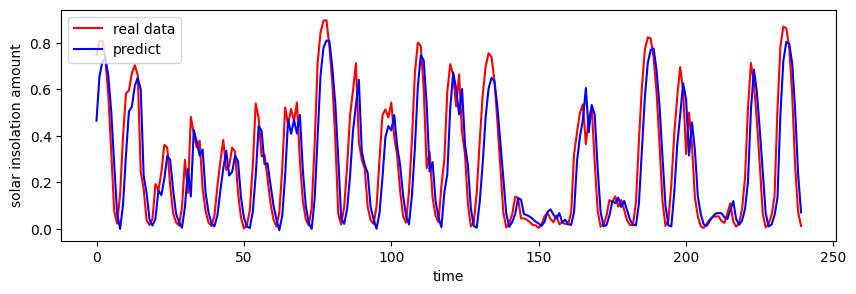

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 240], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 240], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()